In [ ]:
#Exemplo de execução: Biblioteca Pronta x Sua Biblioteca
import numpy as np #from numpy import mean as media

def media(x):
  return sum(x)/len(x)

In [ ]:
x = np.array([10,25,30,45,15,50,60])

In [ ]:
%timeit -n 10 np.mean(x)
%timeit -n 10 media(x)

The slowest run took 4.78 times longer than the fastest. This could mean that an intermediate result is being cached.
8.93 µs ± 6.99 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.93 µs ± 817 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import pandas as pd
dados = pd.read_csv('Dataset_para_Atividade.csv')
dados.head()

,Idade,Salario,Experiencia,Horas_Trabalho_Semanal,Satisfacao
0,56,5954,15,45,1.238602
1,46,3639,25,54,6.271980
2,32,5714,1,44,9.462072
3,60,6955,0,43,6.179268
4,25,5317,11,32,4.493529


In [ ]:
dados.describe()

,Idade,Salario,Experiencia,Horas_Trabalho_Semanal,Satisfacao
count,100.00000,100.000000,100.000000,100.00000,100.000000
mean,40.88000,5102.270000,21.880000,39.66000,5.674989
std,13.99082,1496.545698,11.481456,11.61001,2.803427
min,18.00000,2090.000000,0.000000,20.00000,1.097539
25%,30.50000,3851.500000,15.000000,31.00000,3.537907
50%,41.00000,4986.500000,23.500000,41.00000,5.928156
75%,53.25000,6129.250000,32.000000,49.00000,8.150991
max,64.00000,9415.000000,39.000000,59.00000,9.914546


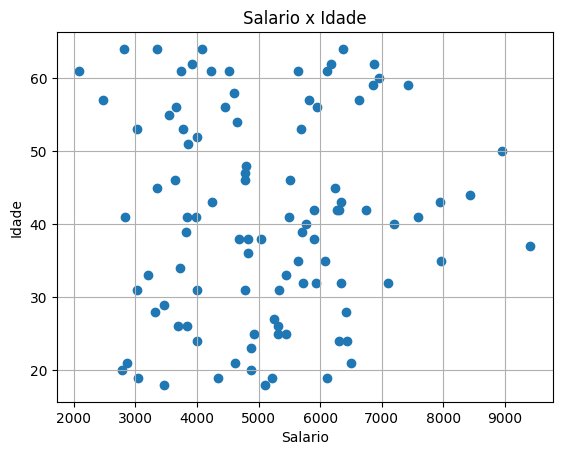

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dados['Salario'], dados['Idade'])
plt.xlabel('Salario')
plt.ylabel('Idade')
plt.title('Salario x Idade')
plt.grid()
plt.show()

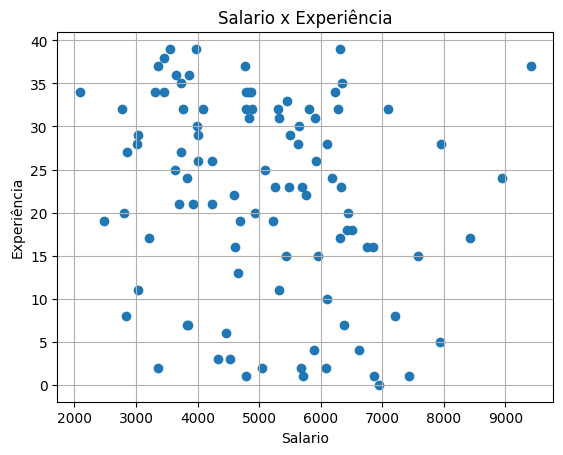

In [ ]:
plt.scatter(dados['Salario'], dados['Experiencia'])
plt.xlabel('Salario')
plt.ylabel('Experiência')
plt.title('Salario x Experiência')
plt.grid()
plt.show()

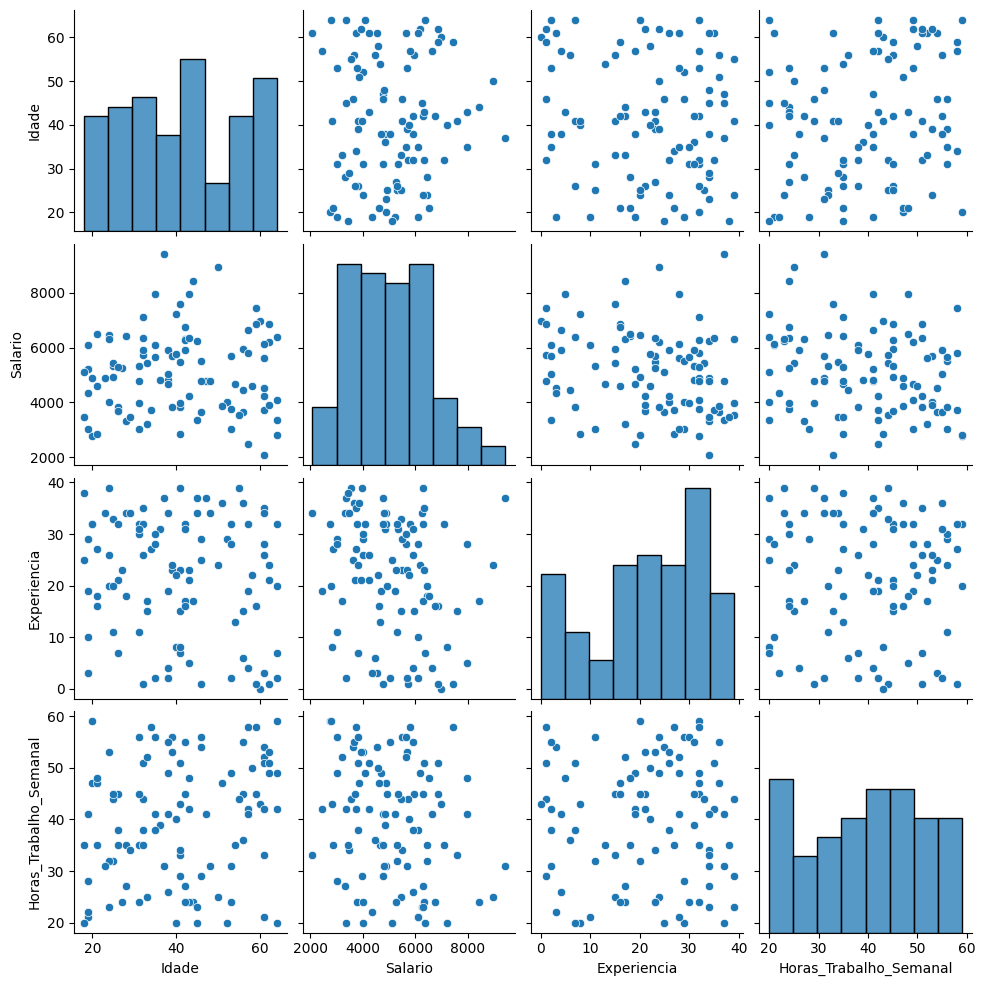

In [ ]:
import seaborn as sns

sns.pairplot(dados.drop(columns='Satisfacao'))

In [ ]:
dados['Satisfacao'].value_counts()

,count
Satisfacao,
1.238602,1
6.271980,1
9.462072,1
6.179268,1
4.493529,1
...,...
6.025638,1
4.817998,1
9.157189,1


In [ ]:
def map_satisfacao(valor):
  if valor <= 2.5:
    return 'Baixa'
  elif valor <= 5.0:
    return 'Média-baixa'
  elif valor <= 7.5:
    return 'Média-alta'
  else:
    return 'Alta'

dados['Nivel_Satisfacao'] = dados['Satisfacao'].apply(map_satisfacao)

In [ ]:
dados.head()

,Idade,Salario,Experiencia,Horas_Trabalho_Semanal,Satisfacao,Nivel_Satisfacao
0,56,5954,15,45,1.238602,Baixa
1,46,3639,25,54,6.271980,Média-alta
2,32,5714,1,44,9.462072,Alta
3,60,6955,0,43,6.179268,Média-alta
4,25,5317,11,32,4.493529,Média-baixa


In [ ]:
dados['Nivel_Satisfacao'].value_counts()

,count
Nivel_Satisfacao,
Alta,36
Baixa,22
Média-baixa,22
Média-alta,20


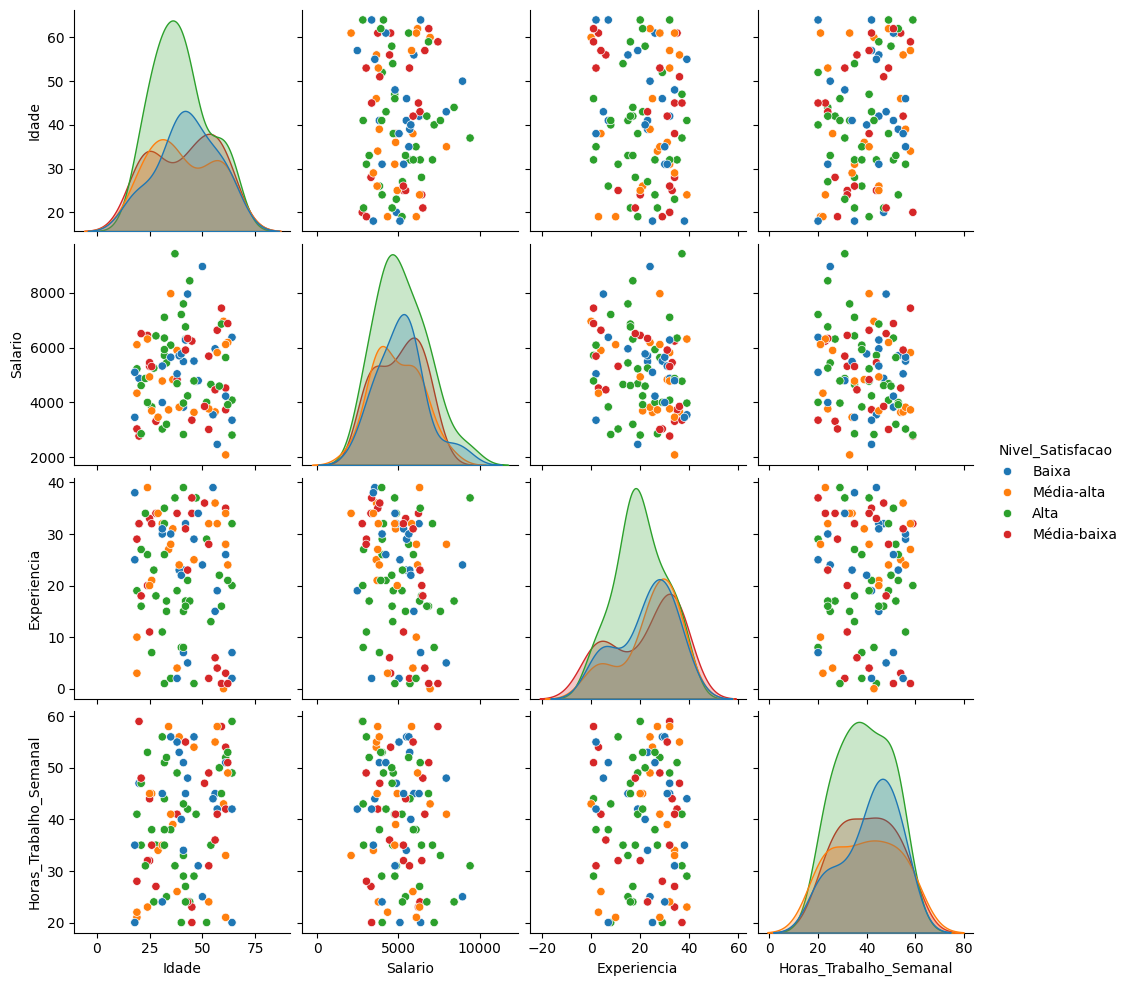

In [ ]:
sns.pairplot(dados.drop(columns='Satisfacao'), hue='Nivel_Satisfacao')

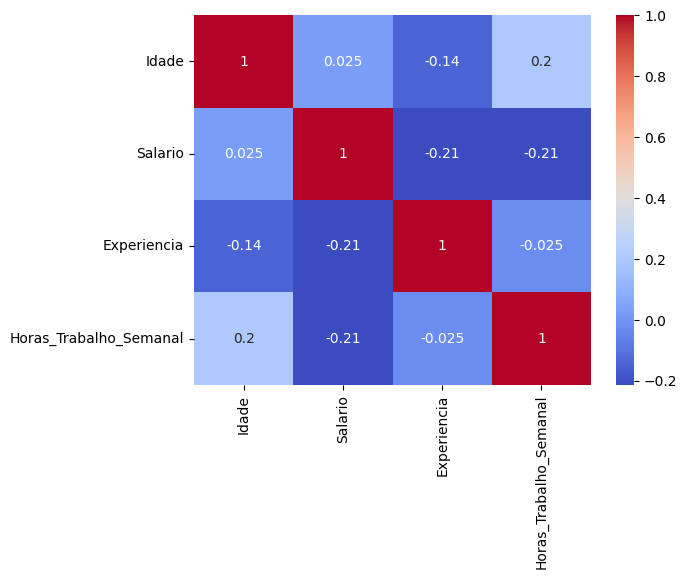

In [ ]:
sns.heatmap(dados.drop(columns=['Satisfacao', 'Nivel_Satisfacao']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
dados.describe()

,Idade,Salario,Experiencia,Horas_Trabalho_Semanal,Satisfacao
count,100.00000,100.000000,100.000000,100.00000,100.000000
mean,40.88000,5102.270000,21.880000,39.66000,5.674989
std,13.99082,1496.545698,11.481456,11.61001,2.803427
min,18.00000,2090.000000,0.000000,20.00000,1.097539
25%,30.50000,3851.500000,15.000000,31.00000,3.537907
50%,41.00000,4986.500000,23.500000,41.00000,5.928156
75%,53.25000,6129.250000,32.000000,49.00000,8.150991
max,64.00000,9415.000000,39.000000,59.00000,9.914546


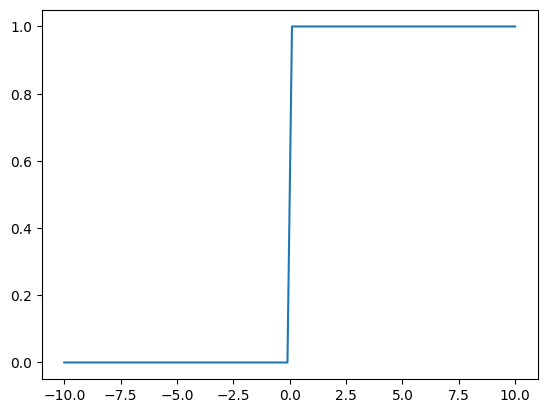

In [ ]:
#Função Degrau
def degrau(x):
  if x < 0:
    return 0
  else:
    return 1

x = np.linspace(-10, 10, 100)
y = [degrau(i) for i in x]

plt.plot(x, y)

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.where(x >= 0, 1, 0)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.activation = activation

    def activate(self, x):
        if self.activation == 'sigmoid':
            return sigmoid(x)
        elif self.activation == 'step':
            return step_function(x)
        else:
            raise ValueError("Função de ativação desconhecida")

    def feedforward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activate(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.activate(self.z2)
        return self.output

# Exemplo de uso:
X = np.array([[0, 1]])  # entrada binária
nn = NeuralNetwork(input_size=2, hidden_size=3, output_size=1)
saida = nn.feedforward(X)
print("Saída da rede:", saida)

Saída da rede: [[0.87568018]]


In [ ]:
nn = NeuralNetwork(input_size=4, hidden_size=1,output_size=1)
saida = nn.feedforward(dados.drop(columns=['Satisfacao', 'Nivel_Satisfacao']))
print("Saída da rede:", saida)

Saída da rede: [[0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [3.78467251e-291]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [4.02348277e-224]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [5.64318301e-305]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [1.74827666e-243]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [0.00000000e+000]
 [5.86897629e-277]
 [0.00000000e+000]
 [0.00000000e+000]
 [3.44046517e-267]
 [0.00000000e+000]
 [9.21328795e-295]
 [0.00000000e+00

<ipython-input-27-1ffeb34fde40>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
# @title Exemplo 2: Nosso modelo com dataset gaf_esp

import pandas as pd

dataset = pd.read_csv('gaf_esp.csv', sep=';')
dataset.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


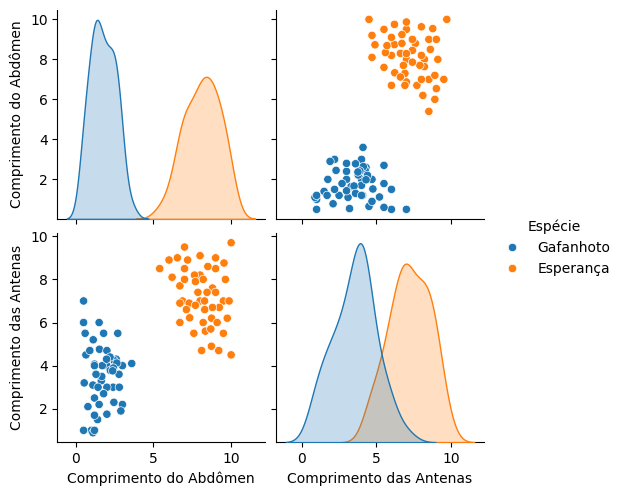

In [ ]:
import seaborn as sns

sns.pairplot(dataset, hue='Espécie')

In [ ]:
# Conversão da saída de label para binário/ número
map_saida = {
    'Gafanhoto': 1,
    'Esperança':0
}
dataset['Espécie_bin'] = dataset['Espécie'].map(map_saida)

In [ ]:
dataset.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas,Espécie_bin
0,Gafanhoto,0.50,7.0,1
1,Gafanhoto,0.50,6.0,1
2,Gafanhoto,0.60,5.5,1
3,Gafanhoto,0.65,4.5,1
4,Gafanhoto,0.54,3.2,1


In [ ]:
# Preparar os dados para treinamento e testes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Espécie','Espécie_bin'], axis=1), dataset['Espécie_bin'], test_size = 0.2)

In [ ]:
X_train.head()

,Comprimento do Abdômen,Comprimento das Antenas
41,1.43,3.0
9,1.20,1.0
62,9.00,8.5
53,5.40,8.5
57,6.87,7.0


In [ ]:
y_train.head()

,Espécie_bin
41,1
9,1
62,0
53,0
57,0


In [ ]:
# Construindo a Rede Neural FeedForward
nn = NeuralNetwork(input_size=2, hidden_size=1, output_size=1, activation='step')
saida = nn.feedforward(X_train)

In [ ]:
# Transformação Linear dos dados para compatibilidade
saida = np.array(saida).reshape(-1,1)

In [ ]:
# Comparação entre saida predita e saida desejada
saida == np.array(y_train)

array([[ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ..., False,  True, False],
       ...,
       [ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ..., False,  True, False]])

In [ ]:
# Métrica de Erro Quadrático Médio
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

mse(np.array(y_train).reshape(-1), saida.reshape(-1))

np.float64(0.5375)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, saida)

0.4625